# Python für Archäologen
### Sitzung 5: Module und Bibliotheken

Ulrich Wölfel (Institut für Archäologie und Kulturanthropologie, Universität Bonn)

## 1 Module

![alt text](https://img.devrant.com/devrant/rant/r_102994_Qv16S.jpg)

Komplette Version: [https://i.imgur.com/ZyeCO.jpg](https://i.imgur.com/ZyeCO.jpg)

In Python stellen *Module* zusätzliche Funktionalität für spezielle Aufgaben zur Verfügung. Dabei ist ein Modul nichts anderes, als eine Zusammenstellung von Funktionen (und auch anderer Konzepte, die wir bisher noch nicht näher kennengelernt haben, wie Konstanten, Klassen...), die typischerweise zur Lösung verwandter Aufgaben dienen. Solch ein Modul kann dem Befehl `import` in die aktuelle Python-Umgebung geladen werden:

`import modulname`

**Achtung**: Solche `import`-Anweisungen sollten *immer am Anfang eines Programms stehen*! Auf diese Weise behalten wir stets den Überblick darüber, was wir alles importieren und vermeiden ein großes Durcheinander im weiteren Verlauf des Programms.

Beispielsweise können wir das Modul `datetime` (für Datums- und Uhrzeitfunktionen) wie folgt importieren:

In [0]:
import datetime

Jetzt steht uns alle Funktionalität aus dem Modul zur Verfügung. Wir können Funktionen aus diesem Modul benutzen, indem wir ihrem Namen den Namen des Moduls voranstellen und die beiden Teile durch einen Punkt trennen, also:

`modulname.funktionsname`

In [0]:
heute = datetime.date(2020, 5, 12)

Es gibt zum einen Module, die *standardmäßig* zu Python gehören (wie z.B. `datetime`), die also immer zur Verfügung stehen, und zum anderen gibt es weitere Module, die in der Regel erst installiert werden müssen. Bei Colab sind viele dieser Module bereits vorinstalliert, wir müssen sie also nur noch importieren!

Warum werden nicht einfach *alle* installierten Module gleich beim Start in die Python-Umgebung geladen? Aus Effizienzgründen - das Laden eines Moduls kostet Zeit und belegt wertvolle Ressourcen, speziell Arbeitsspeicher. Meist benötigen wir für ein Programm nur eine kleine Menge von zusätzlichen Modulen, weshalb es wesentlich einfacher ist, nur die Module zu laden, die wir wirklich brauchen, als eine Menge unnötigen Ballast mitzuschleppen.

Aus genau diesen Überlegungen möchten wir manchmal auch nur einzelne Funktionen aus einem Modul importieren. In Python ist dies wie folgt möglich:

In [0]:
from datetime import date

Hier wird aus dem Modul `datetime` *nur* die Funktion `date` importiert (wir können auch mehrere Funktionen angeben, durch Kommata getrennt). Damit steht uns jetzt die Funktion `date` zur Verfügung - und zwar (weil wir sie separat importiert haben) unter ihrem Namen *ohne* dass wir den Modulnamen voranstellen müssen:

In [0]:
heute = date(2020, 5, 12)

Eine weitere Möglichkeit beim Importieren eines Moduls oder einer Funktion aus einem Modul ist, dass wir seinen Namen durch einen *Alias* ersetzen können. Warum sollten wir das wollen? Zum einen kann es sein, dass der Name der importierten Funktion oder des Moduls bereits in unserem Programm vergeben wurde und es somit zu einem Konflikt kommt, oder aber der Name ist zu lang, um ihn jedes Mal vollständig auszuschreiben. Hierfür gibt es das Schlüsselwort `as`:

In [0]:
import datetime as dt

Jetzt sind alle Funktionen aus `datetime` unter dem Modulnamenalias `dt` verfügbar:

In [0]:
morgen = dt.date(2020, 5, 13)
print(morgen - heute)

1 day, 0:00:00


Ein anderes Beispiel zeigt den Alias einer bestimmten Funktion (in diesem Beispiel ist der ursprüngliche Name schon sehr kurz, aber wir können einen deutschen Namen vergeben):

In [0]:
from datetime import date as datum
morgen = datum(2020, 5, 13)
print(morgen - heute)

1 day, 0:00:00


Module können auch *Untermodule* besitzen und so ganze Pakete (englisch: *packages*) oder Sammlungen von Modulen bilden. So wie zum Beispiel die Namen von Modulen und Funktionen durch Punkte getrennt sind, werden auch die Namen von Modulen und ihren Untermodulen durch Punkte getrennt. Wir werden weiter unten mit `matplotlib.pyplot` ein häufig verwendetes Untermodul des `matplotlib`-Pakets kennenlernen. Liegen Untermodule vor, so können wir entweder (a) das ganze Paket (`import matplotlib`) oder (b) ein individuelles Untermodul (`import matplotlib.pyplot`) oder (c) eine bestimmte Funktion aus einem Untermodul (`from matplotlib.pyplot import plot`) importieren.

Im Folgenden schauen wir uns ein paar Beispiele von nützlichen Modulen an. Für alle Module gibt es im Internet eine Dokumentation, die uns einen Überblick über die zur Verfügung gestellte Funktionalität gibt. Das Lesen dieser Dokumentation ist unerlässlich, um mit Python zu arbeiten. Für besonders populäre (und umfangreiche) Module sind sogar eigene Bücher erschienen.

## 2 Standard-Module

Die *Python Standard Library* stellt [zahlreiche Module](https://docs.python.org/3/library/) zur Verfügung. Einige der wichtigsten Module sind:

*  `math` - grundlegende mathematische Funktionen,
*  `datetime` - Verarbeitung von Datum und Uhrzeit,
*  `re` - reguläre Ausdrücke - eine eigene Sprache zum Durchsuchen und Manipulieren von Text - ein äußerst mächtiges (aber auch kompliziertes) Werkzeug,
*  `os` - Funktionen, um mit dem Betriebssystem zu interagieren, 
*  `sqlite3` - Zugriff auf das weitverbreitete relationale Datenbankmanagementsystem SQLite,
*  `urllib` - Zugriff auf das Internet über URLs.

Wir wollen nachfolgend einen kurzen Blick auf zwei dieser Module werfen, in späteren Sitzungen werden uns einige andere Module begegnen, die wir uns dann näher ansehen.

### 2.1 Das Modul `datetime`

Das Modul [`datetime`](https://docs.python.org/3/library/datetime.html) stellt *Klassen* (dazu mehr in der kommenden Sitzung) zu Uhrzeit und Datum zur Verfügung. Wir haben bereits oben gesehen, wie ein bestimmtes Datum angelegt werden kann und wie zum Beispiel die Differenz zwischen zwei Datumsangaben durch einfache Subtraktion berechnet werden kann. Ebenso lassen sich Zeitangaben erzeugen:

In [0]:
print(f"Die Zoom-Sitzung beginnt um {dt.time(14, 15, 00)}")

Die Zoom-Sitzung beginnt um 14:15:00


Es gibt zahlreiche weitere Funktionen, etwa `now()`, um den aktuellen Zeitstempel zu erhalten:

In [0]:
print(dt.datetime.now())

2020-05-13 15:37:45.256323


### 2.2 Das Modul `math`

Wie der Name schon nahelegt, bietet das Modul [`math`](https://docs.python.org/3/library/math.html) verschiedene grundlegende mathematische Funktionen. 

Importieren wir also erst einmal das Modul:

In [0]:
import math

Jetzt stehen uns die Funktionen aus dem Modul `math` zur Verfügung. Die wichtigsten Funktionen aus `math` sind:

*  `math.ceil(x)` - berechnet die nächst kleinere Ganzzahl zu einer Gleitkommazahl,
*  `math.floor(x)`  - berechnet die nächst größere Ganzzahl zu einer Gleitkommazahl,
*  `math.log(x[, base])` - berechnet den Logarithmus (standardmäßig ist das der natürliche Logarithmus, eine andere Basis kann aber angegeben werden)
*  `math.sqrt(x)` - berechnet die Wurzelfunktion,
*  `math.sin(x)` - berechnet den Sinus im [Bogenmaß](https://de.wikipedia.org/wiki/Radiant_(Einheit)),
*  `math.cos(x)` - berechnet den Cosinus im Bogenmaß,
*  `math.tan(x)` - berechnet den Tangens im Bogenmaß,
*  `math.degrees(x)` - wandelt vom Bogenmaß in Grad um, 
*  `math.radians(x)` - wandelt von Grad ins Bogenmaß um.

Daneben gibt es noch eine Reihe mathematischer *Konstanten*, unter anderem `math.pi` und `math.e`.

Konstanten sind *unveränderliche Werte*, die einmal definiert werden und anschließend nur noch *lesend* verwendet werden können. Sie machen dann Sinn, wenn bestimmte Werte immer wieder in einem Programm verwendet werden sollen und man nicht jedes Mal diesen Wert eingeben möchte (und dabei Gefahr läuft, sich zu vertippen). Die "sprechenden" Namen erleichern das Verständnis des Programms: jeder kann sich sofort denken, welcher Wert sich hinter `math.pi` verbergen wird (auch wenn wir vielleicht nicht wissen, bis zu welcher Stelle diese irrationale Zahl angegeben ist). Dass unser `math.pi` nur eine begrenzte Genauigkeit besitzt, sehen wir sofort, wenn wir sie verwenden:

In [0]:
math.sin(math.pi)

1.2246467991473532e-16

Das Ergebnis sollte eigentlich `0` sein, ist es aber nicht. Dies ist einer der Gründe, weshalb wir bei der Verwendung von Gleitkommazahlen immer auf der Hut sein sollten und z.B. niemals Vergleiche mit dem `==`-Operator machen sollten:

In [0]:
if math.sin(math.pi) == 0:
    print("Python ist heute ganz unerwartet genau!")
else:
    print("Laut Python ist der Sinus von Pi ungleich 0!")

Laut Python ist der Sinus von Pi ungleich 0!


Abhilfe schafft hier ein Vergleich mit einer sehr kleinen Zahl:

In [0]:
if math.sin(math.pi) < 1e-15:
    print("Python sagt: der Sinus von Pi ist gleich 0 (bis auf die Maschinengenauigkeit)!")
else:
    print("Irgendwas stimmt heute nicht mit Python...")

Python sagt: der Sinus von Pi ist gleich 0 (bis auf die Maschinengenauigkeit)!


Jetzt wollen wir uns aber einmal ein produktives Beispiel dafür ansehen, wie wir die Funktionen aus dem `math`-Modul sinnvoll einsetzen können, etwa bei der Berechnung des [Euklidischen Abstands](https://de.wikipedia.org/wiki/Euklidischer_Abstand) 

$$d(p, q) = \sqrt{ (p_0 - q_0)^2 + (p_1 - q_1)^2}$$

zwischen zwei Punkten $p = (p_0, p_1)$ und $q = (q_0, q_1)$ in einem zweidimensionalen [kartesischen Koordinatensystem](https://de.wikipedia.org/wiki/Kartesisches_Koordinatensystem):

In [0]:
def euklidischer_abstand(punkt1, punkt2):
    return math.sqrt((punkt1[0] - punkt2[0]) ** 2 + (punkt1[1] - punkt2[1]) ** 2)
        
punkt1 = (1, 0)
punkt2 = (2, 1)

print(f"Der Euklidische Abstand zwischen den Punkten {punkt1} und {punkt2} " +
      f"beträgt {euklidischer_abstand(punkt1, punkt2)}.")

Der Euklidische Abstand zwischen den Punkten (1, 0) und (2, 1) beträgt 1.4142135623730951.


## 3 Weitere Module

Neben den Modulen der Standard-Bibliothek gibt es zahlreiche(!) weitere Module. Für uns als Archäologen sind natürlich nicht alle Anwendungsgebiete gleich relevant. Für drei interessante Bereiche sind nachfolgend die wichtigsten Module aufgelistet, von denen wir im Rahmen des Kurses auch noch einige kennenlernen werden:

### "Data Science" / Statistik / wissenschaftliches Rechnen

*  [NumPy](https://numpy.org/devdocs/) - ist ein Modul für numerisches Rechnen und stellt die Datenstruktur des n-dimensionalen Arrays zur Verfügung, sowie verschiedene numerische Funktionen (lineare Algebra, Statistik, Fourier-Transformationen...),
*  [SciPy](https://docs.scipy.org/doc/scipy/reference/) - ist ein Modul, das NumPy um verschiedene numerische Algorithmen ergänzt und hierfür zahlreiche Untermodule zur Verfügung stellt, insbesondere für uns interessant ist das Untermodul `scipy.spatial` für räumliche Analysen,
*  [Pandas](https://pandas.pydata.org/docs/) - ist eine Datenanalyse-Bibliothek, die vor allem die Datenstruktur "Dataframe" (analog zu Datenbanktabellen, siehe auch R) zur Verfügung stellt,
*  [Matplotlib](https://matplotlib.org) - ist eine Bibliothek für mathematische Visualisierung mit umfangreichen Plotwerkzeugen.

### Geodatenverarbeitung

*  [GDAL](https://gdal.org/python/) - GDAL (Geospatial Data Abstraction Layer) ist *die* Open Source Bibliothek für die Nutzung von Geodaten, sie unterstützt praktisch alle gängigen Datenformate und liegt zahlreichen Programmen zugrunde, insbesondere QGIS und GRASS, zwei der beliebtesten Open Source GIS Programme,
*  [Geopandas](https://geopandas.org) - ist eine Erweiterung für Pandas, die die Verwendung von Geodaten unterstützt,
*  [Earth Engine](https://earthengine.google.com) - ist eine Cloud-basierte Plattform von Google für die Verarbeitung von Geodaten, speziell ausgelegt für Satellitendaten und große Datensätze, sie wurde ursprünglich für JavaScript entwickelt (warum auch immer!), unterstützt aber auch Python,
*  [Folium](https://python-visualization.github.io/folium/) - dient der schicken Anzeige und Navigation in Kartenlayern.

### Maschinelles Lernen (ML)

*  [Tensorflow](https://www.tensorflow.org) - ist ein Modul von Google zu ML, das sehr umfangreich, aber auch recht komplex ist,
*  [Keras](https://keras.io/getting_started/) - ist eine einsteigerfreundliche Schnittstelle für verschiedene ML-Bibliotheken (u.a. auch Tensorflow),
*  [Scikit-Learn](https://scikit-learn.org/stable/) - ist eine auf SciPy und NumPy basierende ML-Bibliothek.

Einige dieser Module sind sehr umfangreich und böten Stoff für mehrere Lehrveranstaltungen (etwa das SciPy/NumPy/Pandas-Ökosystem), so dass wir uns in diesem Kurs damit begnügen müssen, einige wenige Funktionen ausgewählter Module kennenzulernen. Nachfolgend werden wir nur kurz einen ganz oberflächlichen Blick auf drei Modulen werfen.

### 3.1 Das Modul `numpy`

NumPy ist, wie bereits erwähnt, zusammen mit SciPy für numerische Berechnungen zuständig und stellt Arrays als eigene Datenstruktur zur Verfügung. Inspiriert wurden diese Bibliotheken durch das weit verbreitete kommerzielle numerische Computeralgebrasystem [Matlab](https://de.mathworks.com/products/matlab.html).
 
Wir können NumPy wie folgt importieren:

In [0]:
import numpy as np

Die Erzeugung von Integer-Sequenzen mit `range()` haben wir bereits kennengelernt. Mit NumPy können wir auch Sequenzen von Gleitkommazahlen erzeugen. Hierfür gibt es die Funktion `arange()`, die analog zu `range()` funktioniert (auch hier ist wieder der Startwert enthalten, der Endwert dagegen nicht, der dritte Parameter gibt die Schrittweite an, standardmäßig ist sie `1.0`):

In [0]:
np.arange(1.0, 2.0, 0.1)

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9])

Die NumPy-Datenstruktur `array` erleichtert uns die Arbeit mit numerischen Datensätzen. In einem NumPy-Array können wir immer nur Werte *eines* Datentyps speichern (im Gegensatz zu Listen). Dadurch wird die Verwaltung dieser Daten aber deutlich effizienter (sprich: schneller, gerade bei größeren Datenmengen). Wir können unsere Liste mit Pfostenloch-Durchmessern einfach über die Funktion `array()` in ein NumPy-Array umwandeln:

In [0]:
diam_postholes = [20.4, 19.7, 22.9, 15.4, 17.1, 28.6, 18.5, 23.2]
diam_postholes_np = np.array(diam_postholes)

NumPy-Arrays lassen sich sehr einfach manipulieren, zum Beispiel können wir alle Werte des Arrays durch 100 teilen (um etwa von Zentimetern in Meter umzuwandeln):

In [0]:
diam_postholes_np / 100

array([0.204, 0.197, 0.229, 0.154, 0.171, 0.286, 0.185, 0.232])

Das ist mit einer Liste nicht so einfach und elegant möglich!

Wir können neben einem solchen eindimensionalen Array (mathematisch wäre dies ein *Vektor*) auch ein zweidimensionales Array (also eine Matrix) erzeugen:

In [0]:
meine_matrix = np.array([[1,4,7], [5,8,2], [9,3,5], [7,4,2]])
print(meine_matrix)

[[1 4 7]
 [5 8 2]
 [9 3 5]
 [7 4 2]]


Die Addition von Matrizen funktioniert wie erwartet:

In [0]:
zweite_matrix = np.array([[2,7,3], [9,3,2], [0,2,5], [4,6,8]])
print(meine_matrix + zweite_matrix)

[[ 3 11 10]
 [14 11  4]
 [ 9  5 10]
 [11 10 10]]


Auch die [Matrixmultiplikation](https://de.wikipedia.org/wiki/Matrizenmultiplikation) funktioniert - hierfür gibt es sogar einen eigenen Operator (`@`):

In [0]:
meine_matrix @ np.transpose(zweite_matrix)

array([[ 51,  35,  43,  84],
       [ 72,  73,  26,  84],
       [ 54, 100,  31,  94],
       [ 48,  79,  18,  68]])

### 3.2 Das Modul `matplotlib.pyplot`

Matplotlib ist ein sehr umfangreiches Modul, mit dem mathematische Visualisierungen aller Art angefertigt werden können. Das Untermodul `pyplot` stellt zahlreiche einfach zu benutzende Funktionen für uns zur Verfügung, weshalb wir uns speziell dieses Untermodul ansehen wollen.

Die grafische Ausgabe des Plots wird in Colab in einem eigenen Bereich unterhalb der Code-Zelle angezeigt.

Um eine Reihe von Werten zu plotten, können wir der Funktion `plot()` eine Liste übergeben, die als y-Werte dienen. Die zugehörigen x-Werte werden von `plot()` einfach als Sequenz $0, 1, 2, \ldots$ ergänzt. Die Funktion `show()` zeigt den fertigen Plot an:

In [0]:
import matplotlib.pyplot as plt

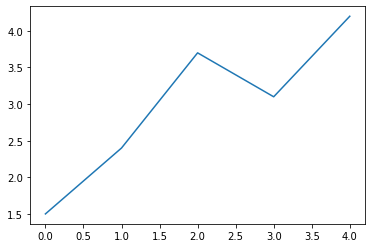

In [17]:
y = [1.5, 2.4, 3.7, 3.1, 4.2]
plt.plot(y)
plt.show()

Liegen uns eigene Werte für die x-Koordinaten vor, so können wir zwei Listen übergeben:

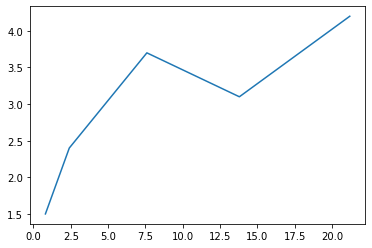

In [22]:
x = [0.8, 2.4, 7.6, 13.8, 21.2]
plt.plot(x, y)
plt.show()

`plot()` zeichnet standardmäßig eine durchgezogene blaue Linie zwischen den einzelnen Punkten. Dieses Verhalten lässt sich durch Hinzufügen eines *Formatierungsstrings* als weiteres Argument ändern. Wollen wir zum Beispiel rote Punkte eingezeichnet haben, so geben wir 'ro' an, 'r' steht für die Farbe Rot, 'o' bezeichnet einen ausgefüllten Punkt:

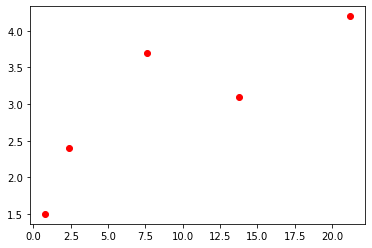

In [34]:
plt.plot(x, y, 'ro')
plt.show()

Die Formatierungsstrings sind an die [Syntax von *Matlab*](https://de.mathworks.com/help/matlab/ref/linespec.html) angelehnt. Es lassen sich verschiedene Linien- (`'-'`, `'--'`, `':'`, `'-.'`) und Punkttypen (`'+'`,  `'*'`, `'.'`, , `'^'`, `'|'`, `'_'`, `','`, `'<'`, `'>'`, `'1'`, `'2'`, `'3'`, `'4'`, `'d'`, `'h'`, `'o'`, `'p'`, `'s'`, `'v'`, `'x'`, `'D'`, `'H'`), sowie Farben (`'r'`, `'g'`, `'b'`, `'c'`, `'m'`, `'y'`, `'k'`, `'w'`) einstellen.

Als nächstes wollen wir eine mathematische Funktion plotten, und zwar den Sinus auf dem Intervall $[-2\pi, 2\pi)$. Hierzu benötigen wir aus NumPy die Funktion `arange()`, um die x-Werte zu erzeugen. Anschließend können wir mit der NumPy-Funktion `sin()` den Sinus für alle x-Werte berechnen und das Ganze plotten lassen. Die Pyplot-Funktionen `xlabel()` und `ylabel()` fügen den Achsen des Plots Beschriftungen hinzu, mit `title()` geben wir dem ganzen Plot noch einen Titel (die Befehle innerhalb von '\$' sind $\mathrm{\LaTeX}$-Code für den Formelsatz). Bevor `show()` aufgerufen wird, können somit durch Aufruf verschiedener Funktionen dem Plot Komponenten hinzugefügt werden.

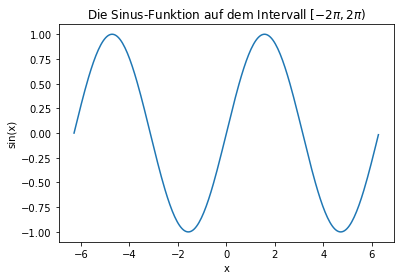

In [36]:
numbers = np.arange(-2*np.pi, 2*np.pi, 0.05)
plt.plot(numbers, np.sin(numbers))
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.title('Die Sinus-Funktion auf dem Intervall $[-2 \pi, 2 \pi)$')
plt.show()

Es gibt noch viele weitere Plot-Funktionen im Package Pyplot, auf die wir in späteren Sitzungen zurückkommen werden.

### 3.3 Das Modul `folium`

Das Modul `folium` dient der Anzeige von interaktiven Karten. Es werden verschiedene "Tilesets" als Kartenmaterial unterstützt. Standardmäßig sind zum Beispiel die folgenden Kacheln verfügbar: 

*  'openstreetmap' (Standardeinstellung),
*  'mapquestopen',
*  'MapQuest Open Aerial',
*  'Stamen Toner',
*  'Stamen Terrain'.

Die Verwendung von `folium` ist denkbar einfach. Wir können mit `folium.Map()` eine Karte erzeugen, wobei wir verschiedene Parameter übergeben können, unter anderem den Ort (`location`, Koordinaten können z.B. als Tupel oder Liste übergeben werden), der angezeigt wird (Mitte der Karte), die Zoomstufe, mit der die Karte anfänglich gezeigt wird (`zoom_start`), sowie die Höhe (`height`) und Breite (`width`) in Pixeln der Karte. Mit der Funktion `display()` kann anschließend die Karte angezeigt werden:

In [0]:
import folium

In [0]:
Bonn = (50.7328709, 7.1034639)
karte = folium.Map(location=Bonn, zoom_start=15)
display(karte)

So einfach ist das! 

Einer Karte können Elemente hinzugefügt werden, zum Beispiel ein Marker, der die durch die Koordinaten angegebene Position anzeigt:

In [0]:
Bonn = (50.7328709, 7.1034639)
karte = folium.Map(location=Bonn, zoom_start=15)
folium.Marker(Bonn).add_to(karte)
display(karte)

Neben den Standard-Tilesets gibt es noch weitere, insbesondere solche mit Luftbildaufnahmen, z.B. von Google:

*  Google Maps Vektor-Layer: 'http://mt0.google.com/vt/lyrs=m&x={x}&y={y}&z={z}'
*  Google Maps Satelliten-Layer: 'http://mt0.google.com/vt/lyrs=s&x={x}&y={y}&z={z}'
*  Google Maps Kombi-Layer: 'http://mt0.google.com/vt/lyrs=y&x={x}&y={y}&z={z}'

Mit dem Parameter `tiles` kann ein anderes Tileset ausgewählt werden. Bei externen Tilesets muß außerdem über den Parameter `attr` ein Hinweis auf den Urheber hinzugefügt werden:

In [0]:
Bonn = (50.7328709, 7.1034639)
karte = folium.Map(
    location=Bonn,
    zoom_start=15,
    tiles='http://mt0.google.com/vt/lyrs=y&x={x}&y={y}&z={z}',
    attr="Google Maps"
)
folium.Marker(Bonn).add_to(karte)
display(karte)

## Übungsaufgaben

Für die Bearbeitung der Übungsaufgaben haben Sie eine Woche Zeit (bis 22. Mai 2020, 23:55 Uhr). Legen Sie hierfür bitte ein neues Colab-Notebook an (File->New Notebook) und fügen Sie für jede Aufgabe eine neue Code-Zelle hinzu (Insert->Code cell). Erklärungen können Sie entweder als Kommentar zum Python-Code hinzufügen oder als Text-Zelle (Insert->Text cell). Für die Abgabe exportieren Sie bitte das Notebook (File->Download .ipynb) und laden Sie die exportierte Datei in eCampus als Lösung zur Übung herauf.

Viel Spaß und viel Erfolg!

1.   **Vermessung mit Tape-and-Compass**: Sie sind unterwegs im Feld und finden eine sensationelle, bisher unentdeckte archäologische Stätte. Sie beschließen, eine halbwegs genaue Karte zu erstellen und die Stätte mit Maßband und Kompass zu vermessen. Das Maßband gibt Ihnen dabei die Distanz zwischen zwei Punkten und der Kompass die Abweichung von der Nord-Richtung. Sie verwenden ein spezielles Kompass-Modell, dessen Skala gegen den Uhrzeigersinn läuft, und bei dem "Norden" auf 90° liegt (damit es keine Inkompatibilitäten zu Pythons mathematischen Funktionen gibt).

  Die folgenden Messwerte haben Sie bereits in einer geeigneten Datenstruktur abgespeichert (eine Liste von Tupeln, in den Tupel ist der erste Wert immer der Winkel, der zweite die Distanz):

In [0]:
measurements = [(90, 5), (180, 8), (270, 5), (0, 8)]

* Bei diesen Koordinaten handelt es sich um sogenannte *Polarkoordinaten*. Was Sie allerdings gerne hätten, sind *Kartesische Koordinaten*. Sie müssen also eine Umwandlung vornehmen...

  Ihr Ziel ist es, das gerade frisch vermessene Gebäude aufzuplotten. Diese Aufgabe können Sie wie folgt in Teilaufgaben unterteilen:

  1.   Schreiben Sie eine Funktion, die für einen gegebenen **Winkel** $\alpha$ und eine **Distanz** $d$ (in Metern) eine Umrechnung von Polar- in Kartesische Koordinaten durchführt. Zum Glück gibt es einfache Umrechnungsformeln, mit denen Sie `x`- und `y`-Koordinaten erhalten:
$$x = d \cdot \cos(\alpha)\enspace,$$
$$y = d \cdot \sin(\alpha)\enspace.$$
       **Achtung**: die Funktionen aus dem `math`-Modul von Python arbeiten *nicht* mit Winkeln, sondern mit Radianten!

  2.   Legen Sie eine Liste mit den Kartesischen Koordinaten für die Messwerte an. Die erste Koordinate setzen (frei gewählt) auf die Werte 
$$x=500\enspace,\quad y=600\enspace.$$
Beachten Sie, dass Sie beim von Punkt zu Punkt gehen immer die vorhergehende (kartesische) Koordinate zu der neuen Koordinate (aus der Umwandlung der Polarkoordinaten) addieren müssen!

  3.   Plotten Sie das Gebäude. Sollten Sie die Kartesischen Koordinaten als Liste von Tupeln der Form `(x, y)` speichern (was durchaus praktisch wäre...), dann müssen Sie, um das gewünschte Plot-Ergebnis zu erhalten, die Funktion `zip()` zusammen mit dem `*`-Operator verwenden: 
  
       `*zip(*meine_liste_von_tupeln)`

     Dieser - sehr merkwürdig anmutende Ausdruck - trennt in einer Liste von Tupeln die Tupel auf, also quasi wie ein Reißverschluß, und übergibt ensprechend einmal alle `x`- und einmal alle `y`-Koordinaten an die Plot-Funktion. Der `*`-Operator löst dabei die äußere Datenstruktur auf, also, der innere Teil des Ausdrucks, `*meine_liste_von_tupeln`, sorgt dafür, dass statt der *Liste* von Tupeln jetzt einfach nur noch die Tupel übergeben werden, und zwar an Zip, welches **eine Anzahl von Tupeln mit *zwei* Werten** in **zwei Tupel mit *einer Anzahl* von Werten** macht. Das äußere `*` wird benötigt, um die Tupel tatsächlich zu erzeugen und an die `plot()`-Funktion zu übergeben (`zip()` ist eine "lazy" Funktion, die erst angestossen werden muss, bevor Sie ihre Werte generiert).

2.  **World Heritage Sites**: In Sitzung 3 hatten wir mit verschiedenen Weltkulturerbestätten gearbeitet, diese liegen jetzt als Wörterbuch vor und sind mit Koordinaten (als Tupel) versehen, die Sie verwenden können, um diese Stätten auf einem Satellitenbild anzuzeigen (zum Beispiel mit dem Google-Tileset)!

  Ihre Aufgabe besteht darin, ein kleines interaktives Programm zu schreiben, das den Benutzer fragt, welche Weltkulturerbestätte er gerne sehen möchte und auf Eingabe einer der Stätten in der Liste diese auf einem Satellitenbild anzeigt.

  Das Wörterbuch mit den Namen der Stätten als Schlüssel und den Koordinatenpaaren als zugeordnete Werte sieht wie folgt aus:

In [0]:
world_heritage_sites = {
    'Machu Picchu': (-13.1635, 72.5457),
    'Giza': (29.9766, 31.1330),
    'Angkor Wat': (13.4125, 103.8665),
    'Stonehenge': (51.1788, -1.8261),
    'Petra': (30.3285, 35.4445),
    'Thebes': (25.7205, 32.6103),
    'Tikal': (17.2221, -89.6235)
}